In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# df_des = pd.read_csv('ML_/train')
df = pd.read_csv("ML_/train.csv") 

In [3]:
df.info()
# print(df.columns)
# df.head()
#PoolQC can be dropped, since na in the feature means no pool.
# drop Fence, MiscFeature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# c = df['SaleCondition'].unique()
# for fea in c:
#     df.loc[df['SaleCondition']==fea, 'SaleCondition']= 'SaleCondition_'+fea
# oh_ = pd.get_dummies(df['SaleCondition'])
# df = df.join(oh_)
# df = df.drop(['SaleCondition'],axis=1)

In [5]:
c = []
for i in df.columns:
    c.append(i)
for i in c:
    print(i, df[i].unique())
#     print(i, df[i].value_counts())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 

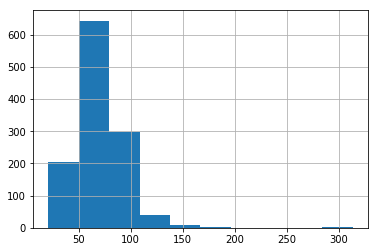

In [6]:
df['LotFrontage'].hist()


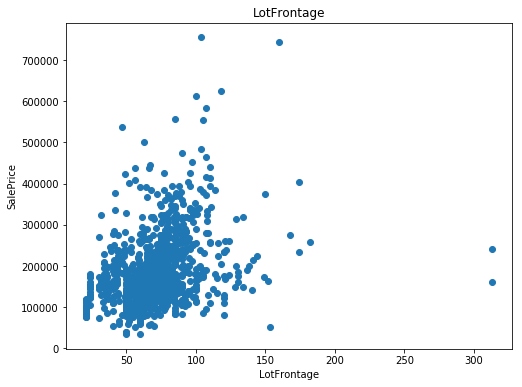

In [7]:
#to see whether na in column 'lotfrontage' can be filled by average number
#to examine lotfrontage/price
prices = df['SalePrice']
def plotFeatureName(featureName):
    plt.figure(figsize=(8,6))
    plt.scatter(df[featureName],prices)
    plt.title(featureName)
    plt.xlabel(featureName)
    plt.ylabel('SalePrice')
plotFeatureName('LotFrontage')


In [8]:
#after visualisation, we decide to fill the na with average
averageLF = df.LotFrontage.mean()
df.LotFrontage = df.LotFrontage.fillna(averageLF)
# df.info()

Missing data: for 'BsmtQual'

In [9]:
# df.BsmtQual.unique()
#so it is to transform to numbers from 1 to 4 and fill na with 0s 

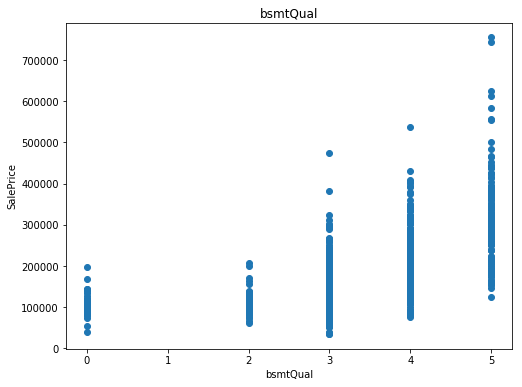

In [10]:
Bsmt_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
df['bsmtQual']= df['BsmtQual'].map(Bsmt_mapping)
df['bsmtQual']=df['bsmtQual'].fillna(0)
plotFeatureName('bsmtQual')
df = df.drop(['BsmtQual'],axis=1)
# seems reasonable from plotting

missing data: 'BsmtCond'

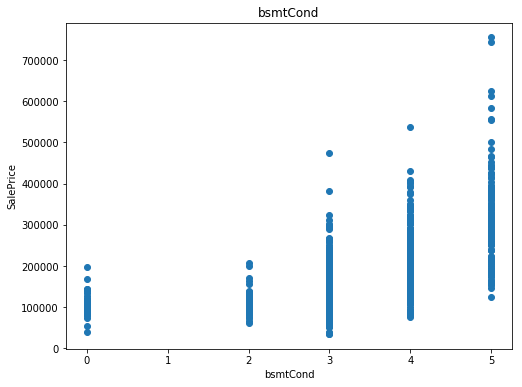

In [11]:
df['bsmtCond']= df['BsmtCond'].map(Bsmt_mapping)
df['bsmtCond']=df['bsmtQual'].fillna(0)
df = df.drop(['BsmtCond'],axis=1)
plotFeatureName('bsmtCond')

'BsmtExposure'

In [12]:
BsmtExposure_mapping = {'Gd':4,'Av':3,'Mn':2,'No':1}
df['bsmtExposure']= df['BsmtExposure'].map(BsmtExposure_mapping)
df['bsmtExposure']=df['bsmtExposure'].fillna(0)
df = df.drop(['BsmtExposure'],axis=1)

ends 'BsmtExposure'

'BsmtFinType1','BsmtFinType2'

In [13]:
# sum(df['BsmtFinType1']== df['BsmtFinType2'])

In [14]:
# df['BsmtFinType1'].unique()

In [15]:
# c = ['BsmtFinType1', 'BsmtFinType2']
bsmtExpo_mapping = {'GLQ':6, 'ALQ':5, 'Unf':4, 'Rec':3, 'BLQ':2, 'LwQ':1}
df['bsmtFinType1']= df['BsmtFinType1'].map(bsmtExpo_mapping)
df['bsmtFinType1']=df['bsmtFinType1'].fillna(0)
df = df.drop(['BsmtFinType1'],axis=1)

In [16]:
df['bsmtFinType2']= df['BsmtFinType2'].map(bsmtExpo_mapping)
df['bsmtFinType2']=df['bsmtFinType2'].fillna(0)
df = df.drop(['BsmtFinType2'],axis=1)

ends 'BsmtFinType1','BsmtFinType2'

df['MasVnrType'], df['MasVnrArea']

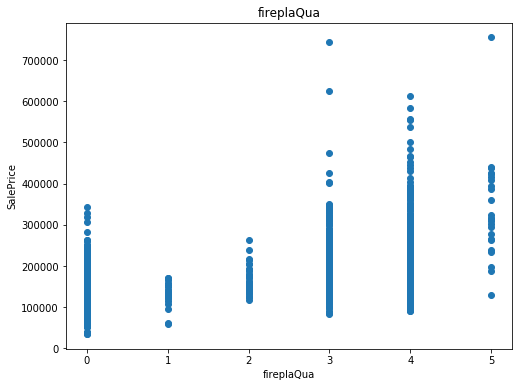

In [17]:
# analogus operation with FireplaceQu
df['FireplaceQu'].unique()
fireplaQua_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
df['fireplaQua']= df['FireplaceQu'].map(fireplaQua_mapping)
df['fireplaQua']=df['fireplaQua'].fillna(0)
df = df.drop(['FireplaceQu'],axis=1)
plotFeatureName('fireplaQua')

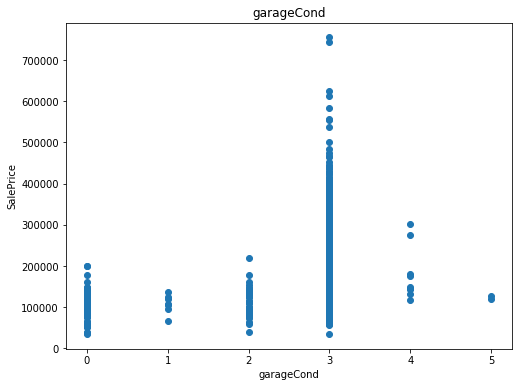

In [18]:
# # to analyze garage related data as a whole.
df['GarageCars'].value_counts()
# # #with 1460-1379=81 nas, seems that all garage related data are completed
# # #na means no garage.

# # #garage quality, condition, furnish, I convert them into one feature and drop the original.
df['GarageCond'].unique()
GarageCond_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
df['garageCond']= df['GarageCond'].map(GarageCond_mapping)
df['garageCond']=df['garageCond'].fillna(0)

df = df.drop(['GarageFinish'],axis=1)
df = df.drop(['GarageQual'],axis=1)
df = df.drop(['GarageCond'],axis=1)

plotFeatureName('garageCond')
# bltDiff = df['YearBuilt']-df['GarageYrBlt']
# print(bltDiff.value_counts())
#GarageYrBlt to standardize.

below for feature 'GarageType'

In [19]:
#na in garagetype means no garage, i fill them with value 'noGa', and then do the dummy variable 
df['GarageType'] = df['GarageType'].fillna("noGa") 

In [20]:
c = df['GarageType'].unique()
for fea in c:
    df.loc[df['GarageType'] == fea, 'GarageType'] = 'GarageType_'+fea
# df.loc[df['GarageType'] == 'Attchd', 'GarageType'] = 'GarageType_Attchd'
df['GarageType'].unique()

array(['GarageType_Attchd', 'GarageType_Detchd', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_noGa', 'GarageType_Basment',
       'GarageType_2Types'], dtype=object)

In [21]:
# dummies
oh_garageType = pd.get_dummies(df['GarageType'])
df = df.join(oh_garageType)
df = df.drop(['GarageType'], axis =1)

end for feature 'GarageType'

for 'GarageYrBlt'

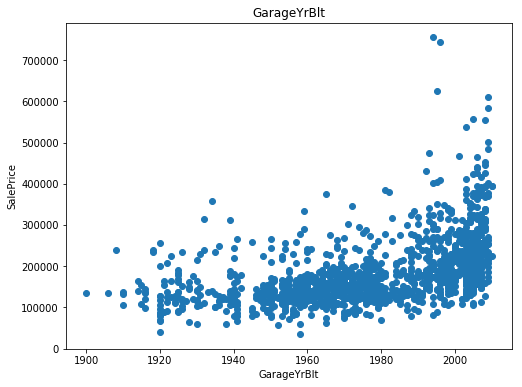

In [22]:
plotFeatureName('GarageYrBlt')

In [23]:
# see from the plotting that 'GarageYrBlt' has not much strong relation with price
# I decide to fill with average

av_gaYrBlt = df['GarageYrBlt'].mean()

In [24]:
av_gaYrBlt = int(av_gaYrBlt)
av_gaYrBlt

1978

In [25]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(av_gaYrBlt)

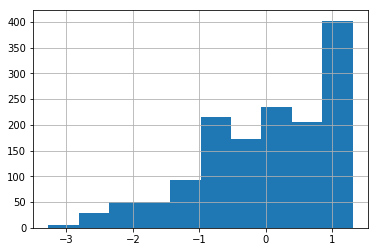

In [26]:
# perform standardize
df['GarageYrBlt_SS'] = StandardScaler().fit_transform(df.GarageYrBlt.values.reshape(-1,1))
df['GarageYrBlt_SS'].hist()

In [27]:
#drop df['GarageYrBlt']
df = df.drop(['GarageYrBlt'], axis =1)

ends for feature df['GarageYrBlt']

for 'MiscFeature','PoolQC','Alley','Fence'

In [28]:
#drop MiscFeature and PoolQC, alley
df = df.drop(['MiscFeature'],axis=1)
df = df.drop(['PoolQC'],axis=1)
df = df.drop(['Alley'],axis=1)

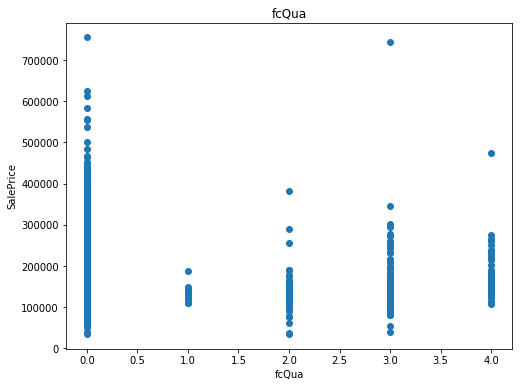

In [29]:
#fence quality, first replace with number, then plot
df['Fence'].unique()
fc_mapping = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1}
df['fcQua']= df['Fence'].map(fc_mapping)
df['fcQua']=df['fcQua'].fillna(0)
df = df.drop(['Fence'],axis=1)
plotFeatureName('fcQua')
#but in fact, there's little relationship in fence quality with price.
#I believe this feature can be dropped
# df.info()

ends the 'MiscFeature','PoolQC','Alley','Fence'

In [30]:
df = df.dropna()

ends data cleaning
-begin data transform

In [31]:
# deal with strings, convert to dummies,

In [32]:
m = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','PavedDrive','SaleType','SaleCondition']

for i in m:
    cho = []
    cho = df[i].unique()
    for cc in cho:
        df.loc[df[i] == cc, i]= i+'_'+cc
    oh_= pd.get_dummies(df[i])
    df = df.join(oh_)
    df = df.drop([i],axis =1)

In [33]:
c = df.columns
df.info()
for i in c:
    print(i,df[i].dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 229 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(35), object(5), uint8(178)
memory usage: 881.7+ KB
Id int64
MSSubClass int64
LotFrontage float64
LotArea int64
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
ExterQual object
ExterCond object
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
HeatingQC object
CentralAir object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Fireplaces int64
GarageCars int64
GarageArea int64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
3SsnPorch int64
ScreenPorch int64
PoolArea int64
MiscVal int64
MoSold int64
YrSold int64
SalePrice int64
bsmtQual float64
bsmtCond float64
bsmtExposure float64
bsmtFinType1 float64
bsmtFinType2 fl

In [34]:
#left with 1451 rows

to deal with last several features: 'ExterQual','ExterCond','HeatingQC','CentralAir','KitchenQual',

    ExterQual, ExterCond, HeatingQC, KitchenQual using 1-5,

In [35]:
# df['Fence'].unique()
# fc_mapping = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1}
# df['fcQua']= df['Fence'].map(fc_mapping)
# df['fcQua']=df['fcQua'].fillna(0)
# df = df.drop(['Fence'],axis=1)

In [36]:
c = [ 'ExterQual','ExterCond','HeatingQC','KitchenQual']
qua_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
for i in c:
    df[i+'_'] = df[i].map(qua_mapping)
    df = df.drop([i],axis = 1)

    CentralAir, 0 denotes N, 1 denotes Y,

In [37]:
ny_mapping = {'N':0, 'Y':1}
df['CentralAir_'] = df['CentralAir'].map(ny_mapping)
df = df.drop(['CentralAir'],axis=1)

In [38]:
tics = df.columns

train_test_split

In [41]:
y = df.SalePrice
X = df.drop(['SalePrice'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np

In [43]:
#still need to turn strings into numbers.
lassoreg = Lasso(alpha=0.00001, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_train)
print ("Mean Squared error: %.2f"%mean_squared_error(y_train,y_pred))
print ("R Squared: %.2f"%r2_score(y_train,y_pred))

Mean Squared error: 488381429.01
R Squared: 0.93


C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [41]:
# c = [1/(10 ** i) for i in range(11)]
# for al in c:
#     lassoreg = Lasso(alpha=al, normalize=True)
#     lassoreg.fit(X_train, y_train)
#     y_pred = lassoreg.predict(X_train)
#     print (al,
#           "Mean Squared error: %.2f"%mean_squared_error(y_train,y_pred),
#           "R Squared: %.2f"%r2_score(y_train,y_pred))

In [42]:

ridgereg = Ridge(alpha = 0.001, normalize=True)
ridgereg.fit(X_train,y_train)
y_pred_train = ridgereg.predict(X_train)
mse = mean_squared_error(y_train,y_pred) ** 0.5
print ("Root Mean Squared error: %.2f"%mse,
          "R Squared: %.2f"%r2_score(y_train,y_pred_train))

Root Mean Squared error: 22099.35 R Squared: 0.93


To perform CV

In [43]:
# Ridge

y_pred_test = ridgereg.predict(X_test)
rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
print('rss: %d'%rss_test,
     "R Squared: %.2f"%r2_score(y_test,y_pred_test))

rss: 32274 R Squared: 0.80


In [44]:
# Lasso
y_pred_test = lassoreg.predict(X_test)
rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
print('rss: %d'%rss_test,
     "R Squared: %.2f"%r2_score(y_test,y_pred_test))

rss: 32629 R Squared: 0.80


I'll try to eliminate all dummies

    drop one feature at a time and see the rmse and r_2

In [51]:
tcs = []
for i in tics:
    tcs.append(i)
tcs.remove('SalePrice')
rr = []
for fea in tcs:
    c = pd.DataFrame()
    c = df.drop([fea],axis=1)
    y = c.SalePrice
    X = c.drop(['SalePrice'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
#     lassoreg = Lasso(alpha=0.00001, normalize=True)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_train)
    
#     y_pred_test = lassoreg.predict(X_test)
    
#     rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
    
#     rmse = (mean_squared_error(y_test,y_pred_test)**0.5)
#     r_two = r2_score(y_test,y_pred_test)
    rr.append([(mean_squared_error(y_train,y_pred)**0.5),r2_score(y_train,y_pred)])
#     print(fea,(mean_squared_error(y_train,y_pred)**0.5), r2_score(y_train,y_pred))

#     df.loc[fea] = pd.Series({'rmse': rmse, 'r2': r_two})


C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

NameError: name 'allFea' is not defined

In [53]:
test_Result = pd.DataFrame(rr, index = tcs, columns = ['rmse','r2'])
test_Result.head()

,rmse,r2
Id,22099.354477,0.927099
MSSubClass,22124.733364,0.926931
LotFrontage,22117.860908,0.926976
LotArea,22495.380699,0.924462
OverallQual,22490.554374,0.924495


This is for insample

In [45]:
#all features
allFea = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','bsmtQual','bsmtCond','bsmtExposure','bsmtFinType1','bsmtFinType2','fireplaQua','garageCond','GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageType_noGa','GarageYrBlt_SS','fcQua','MSZoning_C (all)','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Grvl','Street_Pave','LotShape_IR1','LotShape_IR2','LotShape_IR3','LotShape_Reg','LandContour_Bnk','LandContour_HLS','LandContour_Low','LandContour_Lvl','Utilities_AllPub','Utilities_NoSeWa','LotConfig_Corner','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside','LandSlope_Gtl','LandSlope_Mod','LandSlope_Sev','Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','Condition1_Artery','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','Condition2_Artery','Condition2_Feedr','Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','BldgType_1Fam','BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','HouseStyle_1.5Fin','HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_AsbShng','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Exterior2nd_AsbShng','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_BrkFace','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','Heating_Floor','Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','Electrical_FuseA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev','Functional_Typ','PavedDrive_N','PavedDrive_P','PavedDrive_Y','SaleType_COD','SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial','ExterQual_','ExterCond_','HeatingQC_','KitchenQual_','CentralAir_']

In [49]:
rr = []
for fea in allFea:
    c = pd.DataFrame()
    c = df.drop([fea],axis=1)
    y = c.SalePrice
    X = c.drop(['SalePrice'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
#     lassoreg = Lasso(alpha=0.00001, normalize=True)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_train)
    
#     y_pred_test = lassoreg.predict(X_test)
    
#     rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
    
#     rmse = (mean_squared_error(y_test,y_pred_test)**0.5)
#     r_two = r2_score(y_test,y_pred_test)
    rr.append([(mean_squared_error(y_train,y_pred)**0.5),r2_score(y_train,y_pred)])
#     print(fea,(mean_squared_error(y_train,y_pred)**0.5), r2_score(y_train,y_pred))

#     df.loc[fea] = pd.Series({'rmse': rmse, 'r2': r_two})
    

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

ends in sample

This is for testing

In [55]:
partFea = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd']
rr = []
for fea in partFea:
    c = pd.DataFrame()
    c = df.drop([fea],axis=1)
    y = c.SalePrice
    X = c.drop(['SalePrice'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
#     lassoreg = Lasso(alpha=0.00001, normalize=True)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_train)
    y_pred_test = lassoreg.predict(X_test)
    
#     rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
    
    rmse = (mean_squared_error(y_test,y_pred_test)**0.5)
    r_two = r2_score(y_test,y_pred_test)
    rr.append([rmse,r_two])
#     print(fea,(mean_squared_error(y_train,y_pred)**0.5), r2_score(y_train,y_pred))

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

In [57]:
test_Result = pd.DataFrame(rr, index = partFea, columns = ['rmse','r2'])

In [58]:
test_Result.head()

,rmse,r2
Id,32629.519409,0.800026
MSSubClass,32642.955205,0.799861
LotFrontage,32673.270987,0.799489
LotArea,32010.094119,0.807546
OverallQual,33689.249419,0.786825


test ends

for the whole list and CROSS VALIDATION

In [55]:
#all features
tcs = []
for i in tics:
    tcs.append(i)
tcs.remove('SalePrice')
rr = []
for fea in tcs:
    c = pd.DataFrame()
    c = df.drop([fea],axis=1)
    y = c.SalePrice
    X = c.drop(['SalePrice'],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)
#     lassoreg = Lasso(alpha=0.00001, normalize=True)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_train)
    y_pred_test = lassoreg.predict(X_test)
    
#     rss_test = np.sqrt(sum((y_pred_test - y_test) **2)/len(y_pred_test))
    
    rmse = (mean_squared_error(y_test,y_pred_test)**0.5)
    r_two = r2_score(y_test,y_pred_test)
    rr.append([rmse,r_two])
test_Result = pd.DataFrame(rr, index = tcs, columns = ['rmse','r2'])

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

In [56]:
test_Result[test_Result['r2']<0.76]

,rmse,r2
RoofMatl_ClyTile,45889.711899,0.604466


In [ ]:
c = df.columns
for i in c:
    print (i,df[i].dtypes)

In [ ]:
uu = ['GarageType_2Types','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','GarageType_noGa','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Grvl','Street_Pave','LotShape_IR1','LotShape_IR2','LotShape_IR3','LotShape_Reg','LandContour_Bnk','LandContour_HLS','LandContour_Low','LandContour_Lvl','Utilities_AllPub','Utilities_NoSeWa','LotConfig_Corner','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside','LandSlope_Gtl','LandSlope_Mod','LandSlope_Sev','Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','Condition1_Artery','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','Condition2_Artery','Condition2_Feedr','Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','BldgType_1Fam','BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','HouseStyle_1.5Fin','HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_AsbShng','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Exterior2nd_AsbShng','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_BrkFace','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_BrkCmn','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','Heating_Floor','Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','Electrical_FuseA','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Sev','Functional_Typ','PavedDrive_N','PavedDrive_P','PavedDrive_Y','SaleType_COD','SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','SaleType_WD','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']

In [ ]:
df_1 = df.drop(uu,axis = 1)

In [ ]:
y = df_1.SalePrice
X = df_1.drop(['SalePrice'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=9999)

In [ ]:
lassoreg = Lasso(alpha=0.00001, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_train)
rmse = mean_squared_error(y_train,y_pred) ** 0.5
print ("Root Mean Squared error: %.2f"%rmse)
print ("R Squared: %.2f"%r2_score(y_train,y_pred))

it seems that dummies cannot be throwned

In [ ]:
trainDes = pd.read_table("ML_/data_description.txt",sep='\t',header=None,names=(['a'])) #here I studied the format of txt file.
# trainDes.to_csv("trainDes.csv") #to see it in a whole.

In [ ]:
df.hist(figsize=(300,300))
#[Analysis]there's 38 features in numerical format. and the rest 43 is in verbal.